# Model Creation Tasks

## Case-Study 01: Palmer Penguins

Research and download the [Palmer Penguins dataset](https://archive.ics.uci.edu/dataset/690/palmer+penguins-3) and undertake a wholistic machine learing research, complete with data acquisition, data exploration, data transformation/cleaning (if needed), data splitting, model creation and model evaluation. Make use of cross validation as one of your data splitting strategies. Research how to plot the ROC curve(s) and calculate the area under the curves.

Refer to the [official homepage](https://allisonhorst.github.io/palmerpenguins/) of the dataset for a detailed explanation and inspiration for visual exploration.

### Data Acquisition

In [2]:
#load libraries 
import os
import pandas as pd 
import os.path as osp

#Load data
df= pd.read_csv(osp.join('data', 'penguins.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female,2009


In [5]:
# Create a list for numeric, categorical and all variables
numeric= ['bill_length_mm','bill_depth_mm', ' flipper_length_mm', 'body_mass_g']
categorical=['species', 'island','sex']

columns=[]
columns.append(numeric)
columns.append(categorical)

### Data Exploration 

In [6]:
# Statistical exploration
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [7]:
# Check unique values of each categorical variable
for feature in categorical:
    print(f'Unique values of {feature} are: {df[feature].unique()}')

Unique values of species are: ['Adelie' 'Gentoo' 'Chinstrap']
Unique values of island are: ['Torgersen' 'Biscoe' 'Dream']
Unique values of sex are: ['male' 'female' nan]


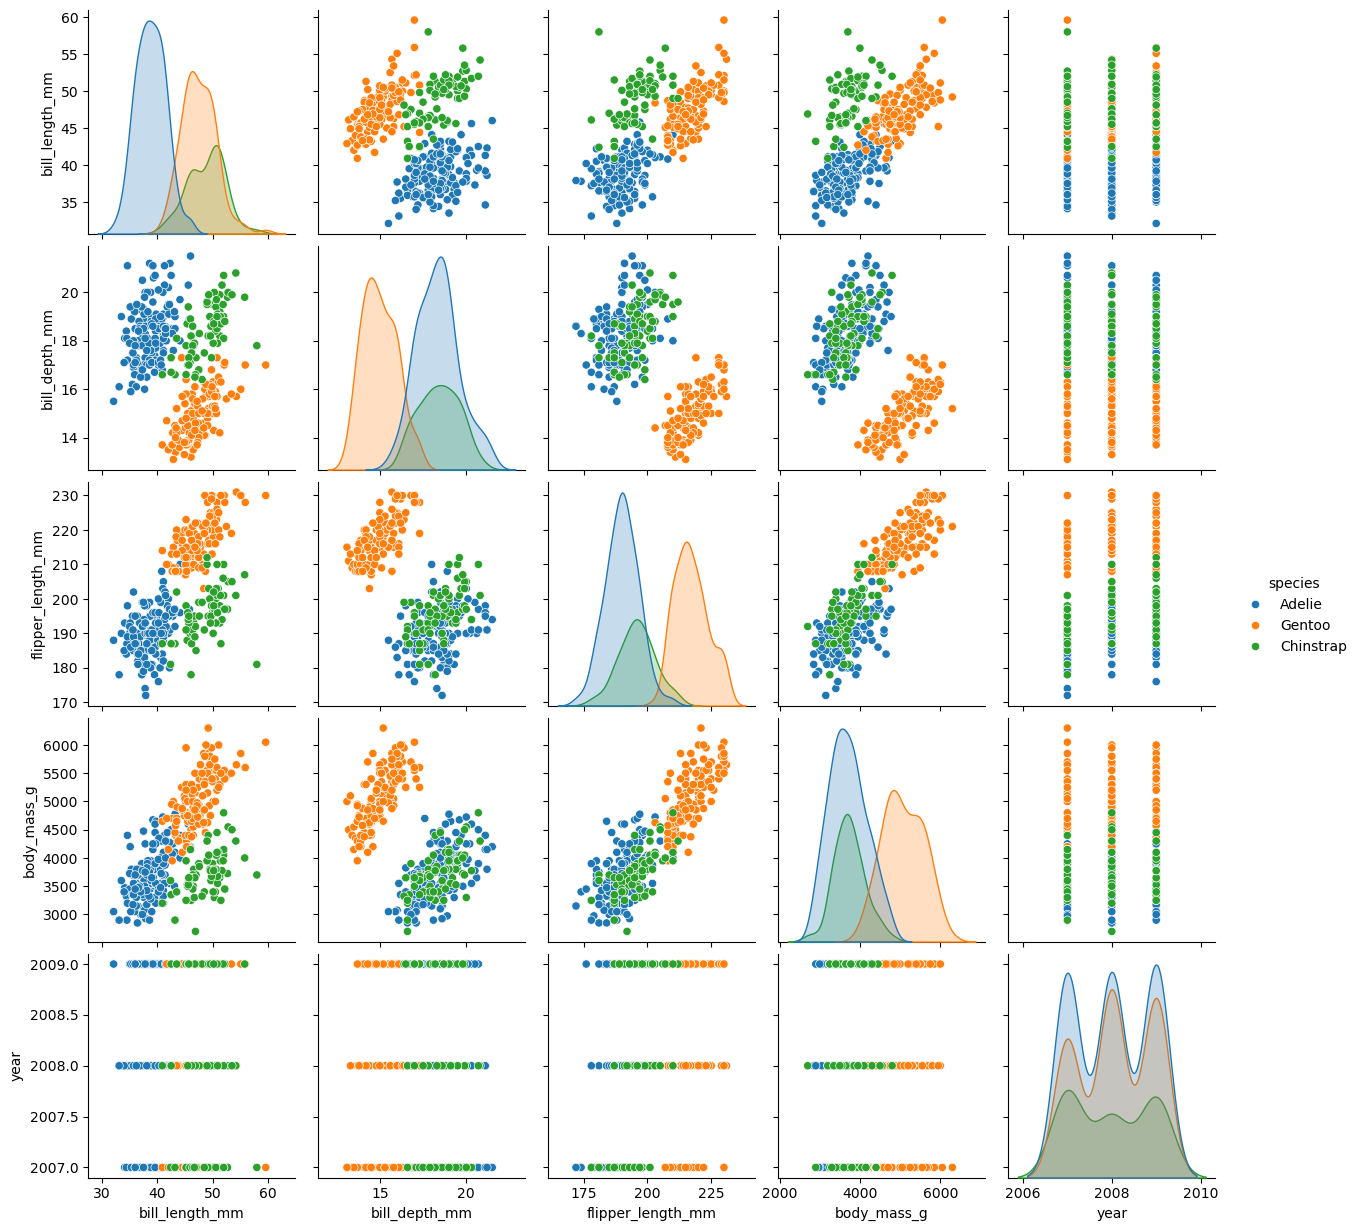

In [8]:
# Basic Visual Exploration

# Load library
import seaborn as sns

# Display pairplot
sns.pairplot(df, hue ='species')

In [9]:
#  Checking the unique values of the target variable
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [10]:
# Checking the value counts per class
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

### Data pre-processing

In [11]:
# One of the first things that we need to do is to shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [12]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Gentoo,Biscoe,48.2,14.3,210.0,4600.0,female,2007
1,Chinstrap,Dream,45.2,17.8,198.0,3950.0,female,2007
2,Gentoo,Biscoe,43.4,14.4,218.0,4600.0,female,2009
3,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2007
4,Gentoo,Biscoe,45.8,14.6,210.0,4200.0,female,2007


In [13]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
339,Chinstrap,Dream,46.4,17.8,191.0,3700.0,female,2008
340,Adelie,Torgersen,39.0,17.1,191.0,3050.0,female,2009
341,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
342,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,male,2008
343,Adelie,Torgersen,40.9,16.8,191.0,3700.0,female,2008


#### Checking for missing values

In [14]:
# Identification of duplicate rows
duplicate_rows= df[df.duplicated()]
duplicate_rows.__len__()

0

In [15]:
# Removing duplicates 
cleaned_df = df.copy().drop_duplicates(inplace=False)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [17]:
# Fix column names (remove any leading/trailing spaces)
df.columns = df.columns.str.strip()

#### Checking for missing values

In [18]:
# Checking for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [19]:
print("Current columns in the DataFrame:")
print(df.columns)

Current columns in the DataFrame:
Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


In [28]:
# Addressing missing values for numeric and categorical variables
#df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)
#df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean(), inplace=True)
#df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
#df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)
#df['sex_female'].fillna('sex_female', inplace=True)
#df['sex_male'].fillna('sex_male', inplace=True)

# Address missing values for numeric variables
numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())

# Address missing values for the categorical 'sex' column
df['sex'] = df['sex'].fillna('Unknown')

KeyError: 'sex'

In [27]:
# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

KeyError: "None of [Index(['sex'], dtype='object')] are in the [columns]"

In [23]:
print(df.columns)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year', 'sex_female', 'sex_male'],
      dtype='object')


## Case-Study 02: Wine+Quality

Research and download the [Wine+Quality dataset](https://archive.ics.uci.edu/dataset/186/wine+quality) and undertake a wholistic machine learning research, complete with data acquisition, data exploration, data transformation/cleaning (if needed), data splitting, model creation and model evaluation. Make use of cross validation as one of your data splitting strategies. The main task is to undertake a regression analysis, yet it is also possible to attempt to classify red versus white wine.